In [1]:
## 2012-03-11_New goal model with neural network ##
## python 3.8 ##
## Sangil Lee ##

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/home/lscall/Dropbox/Ubuntu 18.04/Ubuntu_share/20210122-New Goal Model/experiment data/legacy data/original data/training1.csv', names=['Productivity', 'Efficiency', 'Utilization', 'Flexibility', 'Cost', 'Profits'], engine='python')
df.head()

,Productivity,Efficiency,Utilization,Flexibility,Cost,Profits
0,0.920574,0.326861,0.527807,0.203113,0.994426,1.306219
1,0.484593,0.108276,0.388172,0.465689,0.173284,1.358122
2,0.827789,0.865967,0.930056,0.558215,0.152119,2.302618
3,0.205889,0.216347,0.878902,0.329863,0.244587,0.734088
4,0.066839,0.429225,0.497779,0.009710,0.271564,0.806973


In [ ]:
sns.pairplot(df)

In [3]:
from sklearn.model_selection import train_test_split
X = df[['Productivity', 'Efficiency', 'Utilization', 'Flexibility', 'Cost']].values
y = df[['Profits']].values

In [4]:
X

array([[0.92057372, 0.32686065, 0.52780669, 0.20311267, 0.99442558],
       [0.48459348, 0.10827637, 0.38817224, 0.46568875, 0.17328433],
       [0.82778931, 0.86596672, 0.93005615, 0.55821538, 0.15211851],
       ...,
       [0.82168034, 0.93646112, 0.00314821, 0.00285173, 0.53982852],
       [0.52725431, 0.20996056, 0.42383289, 0.97799274, 0.69523369],
       [0.0615228 , 0.41083936, 0.49447771, 0.3243635 , 0.73257585]])

In [5]:
y

array([[1.30621905],
       [1.35812197],
       [2.30261753],
       [0.73408755],
       [0.80697254],
       [1.45932564],
       [0.56114984],
       [2.75565098],
       [3.10384657],
       [1.48691726],
       [1.52815826],
       [1.65006081],
       [1.97821227],
       [0.68075801],
       [1.39079598],
       [1.14289399],
       [2.01273323],
       [1.91872506],
       [0.95762171],
       [1.99657347],
       [0.6236477 ],
       [0.5965675 ],
       [2.40935148],
       [1.11875536],
       [1.17468912],
       [1.74266089],
       [1.61768786],
       [2.66357039],
       [2.10398569],
       [1.08494462],
       [1.91390064],
       [2.66113086],
       [1.20033323],
       [0.66082054],
       [0.48505627],
       [0.86428119],
       [2.61656154],
       [1.03243024],
       [2.60463279],
       [0.89947891],
       [1.04860881],
       [1.31851363],
       [1.15982243],
       [0.97981852],
       [1.98755327],
       [2.1132921 ],
       [1.50737365],
       [1.879

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

In [7]:
X_train.shape

(250, 5)

In [8]:
X_test.shape

(250, 5)

In [ ]:
## Normalization and fit the data ##

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

In [ ]:
## data transform ##

X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [9]:
## neual network model set up ##

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras import models
from keras import layers
import keras.backend as K
from keras.utils.generic_utils import get_custom_objects

def gaussian(x):
    return K.exp(-K.pow(x,2))

get_custom_objects().update({'gaussian': Activation(gaussian)})

In [10]:
## neual network model layer ##
# create model

def get_model():
    
    model = Sequential([
        Dense(5, input_shape = (5,), activation = 'gaussian'),
        Dense(32, activation = 'gaussian'),
        Dense(64, activation = 'gaussian'),
        Dense(32, activation = 'gaussian'),
        Dense(5, activation = 'gaussian'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adam'
        )
    
    return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 165       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 4,585
Trainable params: 4,585
Non-trainable params: 0
______________________________________________________

In [11]:
# Fit the model
model.fit(X_train, y_train, epochs = 1500)

Epoch 1/1500
8/8 [==============================] - 1s 6ms/step - loss: 0.9346
Epoch 2/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.3966
Epoch 3/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.3742
Epoch 4/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.4266
Epoch 5/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.3863
Epoch 6/1500
8/8 [==============================] - 0s 9ms/step - loss: 0.4141
Epoch 7/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.4152
Epoch 8/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.4515
Epoch 9/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.3893
Epoch 10/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.4566
Epoch 11/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.3859
Epoch 12/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.3987
Epoch 13/1500
8/8 [==============================

8/8 [==============================] - 0s 5ms/step - loss: 0.0515
Epoch 103/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 104/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0494
Epoch 105/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0421
Epoch 106/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 107/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 108/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0480
Epoch 109/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0430
Epoch 110/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0430
Epoch 111/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0467
Epoch 112/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0403
Epoch 113/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0411
Epoch 114/1500
8/8 [=======================

8/8 [==============================] - 0s 6ms/step - loss: 0.0223
Epoch 204/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0223
Epoch 205/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0230
Epoch 206/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0225
Epoch 207/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0262
Epoch 208/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0274
Epoch 209/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0245
Epoch 210/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0238
Epoch 211/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0229
Epoch 212/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0229
Epoch 213/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0203
Epoch 214/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0250
Epoch 215/1500
8/8 [=======================

8/8 [==============================] - 0s 4ms/step - loss: 0.0139
Epoch 305/1500
8/8 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 306/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0097
Epoch 307/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0114
Epoch 308/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0155
Epoch 309/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 310/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0131
Epoch 311/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0104
Epoch 312/1500
8/8 [==============================] - 0s 14ms/step - loss: 0.0106
Epoch 313/1500
8/8 [==============================] - 0s 16ms/step - loss: 0.0096
Epoch 314/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0138
Epoch 315/1500
8/8 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 316/1500
8/8 [=====================

Epoch 405/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 406/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 407/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0077
Epoch 408/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 409/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 410/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 411/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 412/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 413/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 414/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 415/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 416/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 417/1500
8/8 [========

8/8 [==============================] - 0s 23ms/step - loss: 0.0060
Epoch 507/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 508/1500
8/8 [==============================] - 0s 9ms/step - loss: 0.0045
Epoch 509/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 510/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 511/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0045
Epoch 512/1500
8/8 [==============================] - 0s 15ms/step - loss: 0.0046
Epoch 513/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 514/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 515/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 516/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 517/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 518/1500
8/8 [=====================

8/8 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 608/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 609/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 610/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 611/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 612/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 613/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 614/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 615/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 616/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 617/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 618/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 619/1500
8/8 [=======================

8/8 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 709/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 710/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0082
Epoch 711/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 712/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 713/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 714/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 715/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 716/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 717/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 718/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 719/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 720/1500
8/8 [=======================

8/8 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 810/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 811/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 812/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 813/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 814/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 815/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 816/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 817/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 818/1500
8/8 [==============================] - 0s 17ms/step - loss: 0.0025
Epoch 819/1500
8/8 [==============================] - 0s 19ms/step - loss: 0.0025
Epoch 820/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 821/1500
8/8 [=====================

8/8 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 911/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 912/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 913/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 914/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 915/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 916/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 917/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 918/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 919/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 920/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 921/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 922/1500
8/8 [=======================

8/8 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 1012/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 1013/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 1014/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 1015/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 1016/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 1017/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 1018/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 1019/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 1020/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0022
Epoch 1021/1500
8/8 [==============================] - 0s 17ms/step - loss: 0.0021
Epoch 1022/1500
8/8 [==============================] - 0s 14ms/step - loss: 0.0025
Epoch 1023/1500
8/8 [========

8/8 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 1112/1500
8/8 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 1113/1500
8/8 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 1114/1500
8/8 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 1115/1500
8/8 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 1116/1500
8/8 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 1117/1500
8/8 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 1118/1500
8/8 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 1119/1500
8/8 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 1120/1500
8/8 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 1121/1500
8/8 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 1122/1500
8/8 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 1123/1500
8/8 [===========

Epoch 1211/1500
8/8 [==============================] - 0s 15ms/step - loss: 0.0024
Epoch 1212/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 1213/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 1214/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 1215/1500
8/8 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 1216/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 1217/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 1218/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 1219/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 1220/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 1221/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 1222/1500
8/8 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 1223/150

8/8 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 1311/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 1312/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 1313/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1314/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 1315/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 1316/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 1317/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 1318/1500
8/8 [==============================] - 0s 4ms/step - loss: 9.2648e-04
Epoch 1319/1500
8/8 [==============================] - 0s 4ms/step - loss: 9.6654e-04
Epoch 1320/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 1321/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 1322/1500
8/8 [===

Epoch 1407/1500
8/8 [==============================] - 0s 2ms/step - loss: 7.9788e-04
Epoch 1408/1500
8/8 [==============================] - 0s 11ms/step - loss: 7.7060e-04
Epoch 1409/1500
8/8 [==============================] - 0s 4ms/step - loss: 7.2675e-04
Epoch 1410/1500
8/8 [==============================] - 0s 3ms/step - loss: 8.4116e-04
Epoch 1411/1500
8/8 [==============================] - 0s 4ms/step - loss: 8.2447e-04
Epoch 1412/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1413/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 1414/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 1415/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 1416/1500
8/8 [==============================] - 0s 4ms/step - loss: 9.3291e-04
Epoch 1417/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 1418/1500
8/8 [==============================] - 0s 3ms/step - loss

In [12]:
# Look at the training history
loss_df = pd.DataFrame(model.history.history['loss'])

<AxesSubplot:>

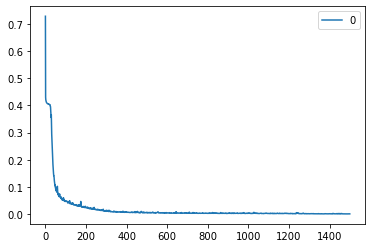

In [13]:
# Plot the losses
loss_df.plot()

In [14]:
# Model Evaluation
# Method 1
model.evaluate(X_test, y_test, verbose = 0)

0.0023714653216302395

In [15]:
model.evaluate(X_train, y_train, verbose = 0)

0.0005128369084559381

In [16]:
test_predictions = model.predict(X_test)

In [17]:
test_predictions = pd.Series(test_predictions.reshape(250,))

In [18]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df

,Test True Y
0,2.316927
1,0.561150
2,1.318514
3,0.837659
4,2.703791
...,...
245,1.167565
246,2.399600
247,2.494419
248,0.906241


In [19]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df

,Test True Y,0
0,2.316927,2.300158
1,0.561150,0.633938
2,1.318514,1.369678
3,0.837659,0.906418
4,2.703791,2.654599
...,...,...
245,1.167565,1.114502
246,2.399600,2.347556
247,2.494419,2.512569
248,0.906241,0.916252


In [20]:
pred_df.columns = ['Test True Y', 'Model Predictions']
pred_df

,Test True Y,Model Predictions
0,2.316927,2.300158
1,0.561150,0.633938
2,1.318514,1.369678
3,0.837659,0.906418
4,2.703791,2.654599
...,...,...
245,1.167565,1.114502
246,2.399600,2.347556
247,2.494419,2.512569
248,0.906241,0.916252


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

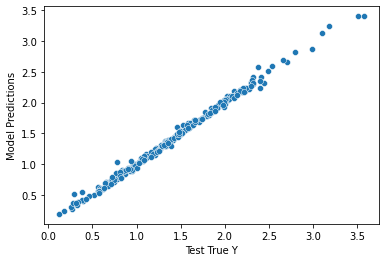

In [21]:
sns.scatterplot(x = 'Test True Y', y = 'Model Predictions', data=pred_df)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

0.032895885516986086

In [24]:
df.describe()

,Productivity,Efficiency,Utilization,Flexibility,Cost,Profits
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.485033,0.502687,0.498929,0.511487,0.493451,1.437711
std,0.287185,0.298800,0.285695,0.294206,0.296256,0.638877
min,0.001588,0.000965,0.001264,0.002852,0.000454,0.120175
25%,0.227320,0.216063,0.247879,0.257727,0.228805,0.947447
50%,0.476073,0.496219,0.502359,0.535935,0.501299,1.374400
75%,0.732618,0.762582,0.742396,0.768167,0.746639,1.909524
max,0.998899,0.998522,0.998820,0.999955,0.998971,3.576721


In [25]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

0.002371465120892414

In [26]:
preds = model.predict(X_test)

evals = model.evaluate(X_test, y_test)

print(evals)
print(preds[0:500])

8/8 [==============================] - 0s 3ms/step - loss: 0.0024
0.0023714653216302395
[[2.3001575 ]
 [0.6339383 ]
 [1.3696778 ]
 [0.9064176 ]
 [2.6545987 ]
 [0.88995385]
 [2.1957765 ]
 [1.317025  ]
 [1.4796855 ]
 [0.91871035]
 [0.975505  ]
 [1.5379639 ]
 [1.3756428 ]
 [3.2550955 ]
 [1.3595407 ]
 [2.1030488 ]
 [1.7140212 ]
 [1.6133649 ]
 [1.3222033 ]
 [3.404087  ]
 [0.6045041 ]
 [0.88634753]
 [0.85020345]
 [1.5724107 ]
 [2.690727  ]
 [0.76800114]
 [1.4362276 ]
 [1.1147103 ]
 [1.177039  ]
 [1.631598  ]
 [2.240927  ]
 [1.1425028 ]
 [0.6647962 ]
 [2.035858  ]
 [1.4045227 ]
 [2.334985  ]
 [1.7805595 ]
 [1.0057727 ]
 [1.8432667 ]
 [1.5806212 ]
 [2.2590215 ]
 [1.3916982 ]
 [1.2240429 ]
 [0.7094805 ]
 [1.6238084 ]
 [1.4723532 ]
 [1.7981789 ]
 [0.6656029 ]
 [1.5957694 ]
 [2.3232977 ]
 [1.7169993 ]
 [0.9396156 ]
 [1.0385065 ]
 [0.61038727]
 [0.9536727 ]
 [2.1958673 ]
 [0.9313446 ]
 [0.81357527]
 [1.5488726 ]
 [1.668103  ]
 [1.0826344 ]
 [1.3771064 ]
 [2.1066637 ]
 [0.86187077]
 [0.69953156]
 [

In [27]:
## change the input value which are initial value from machine learning

sample_dataset = tf.convert_to_tensor([[0.77062669827, 0.42065493431, 0.3, 0.37307360956, 0.3]])

predictions = model(sample_dataset)

print("predicted Answer : " ,  model.predict(sample_dataset))

predicted Answer :  [[1.7502642]]


In [28]:
## sample code to predict goal model value


sample_dataset = tf.convert_to_tensor([[0.695317852, 0.580114717, 0.3, 0.3, 0.3]])

predictions = model(sample_dataset)

print("predicted Answer : " ,  model.predict(sample_dataset))

predicted Answer :  [[1.834122]]
